##### Copyright 2018 The TensorFlow Probability Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Distributions: 簡単な紹介

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/probability/examples/TensorFlow_Distributions_Tutorial" class=""><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/probability/examples/TensorFlow_Distributions_Tutorial.ipynb" class=""><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab で実行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/probability/examples/TensorFlow_Distributions_Tutorial.ipynb" class=""><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub でソースを表示</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a></td>
</table>

このノートブックでは、TensorFlow Distributions（略して TFD）を探ります。このノートブックの目標は、TFD によるテンソル形状の処理を理解することを含み、学習曲線をやんわりと上昇させることであるため、抽象的な概念ではなく、まずは例を示すことから始めます。まず正式で簡単なやり方を紹介しようとしているため、最も一般的で抽象的な観点は最後まで説明しません。より抽象的なリファレンス形式のチュートリアルをご希望の方は、「[TensorFlow Distributions の形状を理解する](https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb)」をご覧ください。ここに記載されている教材に関するご質問があれば、お気軽に[TensorFlow Probability メーリングリスト](https://groups.google.com/a/tensorflow.org/forum/#!forum/tfprobability)にお問い合わせください（またはご参加ください）。喜んでお手伝いいたします。

始める前に、適切なライブラリをインポートする必要があります。総合ライブラリは `tensorflow_probability` です。慣例として、一般的に分布ライブラリを `tfd` と言及しています。

[Tensorflow Eager](https://www.tensorflow.org/guide/eager) は、TensorFlow の命令型実行環境です。TensorFlow Eager では、すべての TF 演算は即時に評価され、結果を生成します。これは、TensorFlow の標準的な「graph」モードと対比するもので、graph モードの場合、TF 演算はグラフにノードを追加した後で、実行されます。このノートブックはすべて TF Eager モードを使用して記述されています。ただし、ここに紹介されている概念はどれも Eager に依存しているということではなく、TFP は graph モードでも使用可能です。

In [ ]:
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
  tf.compat.v1.enable_eager_execution()
except ValueError:
  pass

import matplotlib.pyplot as plt

## 基本的な単変量分布


早速、正規分布を作成しましょう。

In [3]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

この分布からサンプルを抽出できます。

In [4]:
n.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.25322816>

複数のサンプルを抽出できます。

In [5]:
n.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4658079, -0.5653636,  0.9314412], dtype=float32)>

対数確率を評価できます。

In [6]:
n.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

複数の対数確率を評価できます。

In [7]:
n.log_prob([0., 2., 4.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9189385, -2.9189386, -8.918939 ], dtype=float32)>

多様な分布が用意されています。ベルヌーイを試してみましょう。

In [8]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [9]:
b.sample()

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [10]:
b.sample(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)>

In [11]:
b.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.35667497>

In [12]:
b.log_prob([1, 0, 1, 0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.35667497, -1.2039728 , -0.35667497, -1.2039728 ], dtype=float32)>

## 多変量分布

対角共分散で多変量正規分布を作成します。

In [13]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

これを先程作成した単変量正規分布と比較すると、何が異なっていますか？ 

In [14]:
tfd.Normal(loc=0., scale=1.)

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

We see that the univariate normal has an `event_shape` of `()`, indicating it's a scalar distribution. The multivariate normal has an `event_shape` of `2`, indicating the basic [event space](https://en.wikipedia.org/wiki/Event_(probability_theory)) of this distribution is two-dimensional.

サンプリングは、前と同じように行います。

In [15]:
nd.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2489667, 15.025171 ], dtype=float32)>

In [16]:
nd.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-1.5439653 ,  8.9968405 ],
       [-0.38730723, 12.448896  ],
       [-0.8697963 ,  9.330035  ],
       [-1.2541095 , 10.268944  ],
       [ 2.3475595 , 13.184147  ]], dtype=float32)>

In [17]:
nd.log_prob([0., 10])

<tf.Tensor: shape=(), dtype=float32, numpy=-3.2241714>

一般に、多変量正規分布には対角共分散がありません。TFD では、多変量正規分布を作成するために、以下で使用する全共分散指定（共分散行列のコレスキー因子でパラメータ化）などのさまざまな方法が用意されています。

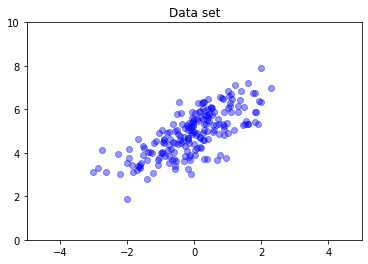

In [18]:
covariance_matrix = [[1., .7], [.7, 1.]]
nd = tfd.MultivariateNormalTriL(
    loc = [0., 5], scale_tril = tf.linalg.cholesky(covariance_matrix))
data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

## 複数の分布

最初のベルヌーイ分布は、公正な 1 つのコイン投げを表しましたが、1 つの `Distribution` オブジェクトで、それぞれが独自のパラメータを持つ独立したベルヌーイ分布のバッチを作成することもできます。

In [19]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

これが意味するところを明確にしておくことが重要です。上記の呼び出しでは、3 つの独立したベルヌーイ分布が定義されいますが、偶然にもこれらは同じ Python `Distribution` オブジェクトに含まれています。`batch_shape` が `(3,)` として、バッチに 3 つの分布があることを示し、`event_shape` が `()` として、個別の分布に単変量の事象空間があることを示していることに注意してください。

`sample` を呼び出すと、3 つすべての分布からサンプルが取得されます。

In [20]:
b3.sample()

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 1], dtype=int32)>

In [21]:
b3.sample(6)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=int32)>

`prob` を呼び出すと（これには `log_prob` と同じ形状セマンティクスがあります。明確にするために、これらの小さなベルヌーイの例では `prob` を使用しますが、通常アプリケーションでは、`log_prob` が好まれています）、それをベクトルに渡して、その値を出すコインの確率を評価できます。

In [22]:
b3.prob([1, 1, 0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.29999998], dtype=float32)>

API にはなぜバッチ形状が含まれているのでしょうか。セマンティクスの観点では、分布のリストを作成して `for` ループ（少なくとも Eager モードの場合。TF graph モードの場合は、`tf.while` ループが必要です）でイテレートすることで、同じ計算を実行できるでしょう。ところが、ハードウェアアクセラレータを使用して高速計算を実行できるには、同じようにパラメータ化された分布の（潜在的に大きな）セットがあるのが極めて一般的であり、ベクトル化された計算を可能な限り使用することが重要です。

## Independent を使用して、バッチを事象に集計する

前のセクションでは、`b3` という、3 つのコイン投げを表す単一の `Distribution` オブジェクトを作成しました。ベクトル $v$ に `b3.prob` を呼び出すと、$i$ 回目のエントリが、$i$ 個目のコインの値が $v[i]$ になるという確率でした。

代わりに、根底にある同じ族の独立した確率変数に対して「同時」分布を指定するとしましょう。これは、数学的に異なるオブジェクトで、この分布の場合、ベクトル $v$ の`prob` は、全セットのコインがベクトル $v$ に一致する確率を表す 1 つの値を返します。

どのようにして行うのでしょうか。`Independent` という「高次」分布を使用します。これは、1 つの分布を取得し、バッチ形状がイベント形状に移動した新しい分布を生成します。

In [23]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
b3_joint

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[] event_shape=[3] dtype=int32>

この形状を、元の `b3` の形状に比較します。

In [24]:
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

約束したとおり、`Independent` がバッチ形状をイベント形状に移動したのがわかります。`b3_joint` は 3 次元の事象空間（`event_shape = (3,)`）に対する単一の分布（`batch_shape = ()`）です。

セマンティクスを確認しましょう。

In [25]:
b3_joint.prob([1, 1, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999998>

同じ結果が得られる別の方法として、`b3` を使用して確率を計算し、乗算（または対数確率が使用されるより一般的なケースでは加算）して手動で縮減することができます。

In [26]:
tf.reduce_prod(b3.prob([1, 1, 0]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999994>

`Indpendent` を使うと、ユーザーはより明示的に希望する概念を表現することができます。必ずしも必要ではありませんが、非常に便利であると考えています。

豆知識:

- `b3.sample` と `b3_joint.sample` の概念的な実装は異なりますが、出力の見分けがつきません。独立した分布のバッチと、`Independent` を使用してバッチから作成された単一の分布の違いは、サンプリング中ではなく、確率を計算中に現れます。
- `MultivariateNormalDiag` はスカラー `Normal` と `Independent` 分布を使って自明的に実装されている可能性があります（実際にはこのように実装されていなくても、その可能性はあります）。


## 多変量分布のバッチ

3 つの全共分散と 2 次元の多変量正規分布のバッチを作成しましょう。 

In [27]:
covariance_matrix = [[[1., .1], [.1, 1.]], 
                      [[1., .3], [.3, 1.]],
                      [[1., .5], [.5, 1.]]]
nd_batch = tfd.MultivariateNormalTriL(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    scale_tril = tf.linalg.cholesky(covariance_matrix))
nd_batch

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[3] event_shape=[2] dtype=float32>

`batch_shape = (3,)` であるため、3 つの独立した多変量正規分布があり、`event_shape =  (2,)`、つまり各多変量正規分布が 2 次元であることがわかります。この例では、各分布には独立した要素はありません。

サンプリング作業

In [28]:
nd_batch.sample(4)

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[ 0.7367498 ,  2.730996  ],
        [-0.74080074, -0.36466932],
        [ 0.6516018 ,  0.9391426 ]],

       [[ 1.038303  ,  0.12231752],
        [-0.94788766, -1.204232  ],
        [ 4.059758  ,  3.035752  ]],

       [[ 0.56903946, -0.06875849],
        [-0.35127294,  0.5311631 ],
        [ 3.4635801 ,  4.565582  ]],

       [[-0.15989424, -0.25715637],
        [ 0.87479895,  0.97391707],
        [ 0.5211419 ,  2.32108   ]]], dtype=float32)>

`batch_shape = (3,)` および `event_shape = (2,)` であるため、形状 `(3, 2)` のテンソルを `log_prob` に渡します。

In [29]:
nd_batch.log_prob([[0., 0.], [1., 1.], [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.8328519, -1.7907217, -1.694036 ], dtype=float32)>

## ブロードキャスト、なぜこれがわかりにくいのか

これまで行ってきたことをまとめると、各分布にはバッチ形状 `B` とイベント形状 `E` があります。`BE` をイベント形状の連結としましょう。

- 単変量スカラー分布 `n` と `b` については、`BE = ()` となります。
- 2 次元多変量正規分布 `nd` であれば、`BE = (2)` となります。
- `b3` と `b3_joint` の両方であれば、`BE = (3)` となります。
- 多変量正規分布のバッチ `ndb` であれば、`BE = (3, 2)` となります。

これまで使用してきた「評価ルール」は次のとおりです。

- 引数なしのサンプルは、形状 `BE` のテンソルを返します。スカラー n でサンプリングすると、「n × `BE`」テンソルを返します。
- `prob` と `log_prob` は形状 `BE` のテンソルを取得し、形状 `B` の結果を返します。

`prob` と `log_prob` の実際の「評価ルール」は、潜在的なパワーとスピードだけでなく、複雑さと課題も提供するという点で、より複雑です。実際のルールは（基本的に）<strong data-md-type="raw_html">`log_prob` の引数は、<code data-md-type="raw_html">BE</code> に対して<a data-md-type="raw_html" href="https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html">ブロードキャスト可能</a>である<em data-md-type="raw_html">必要があります</em>。すべての「追加の」次元は、出力に維持されます</strong>。 

その影響を調べてみましょう。単変量正規分布 `n` の場合は `BE = ()` であるため、`log_prob` はスカラーを期待します。`log_prob` に空以外の形状のテンソルを渡すと、それらは、出力にバッチ次元として現れます。

In [30]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [31]:
n.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [32]:
n.log_prob([0.])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9189385], dtype=float32)>

In [33]:
n.log_prob([[0., 1.], [-1., 2.]])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.9189385, -1.4189385],
       [-1.4189385, -2.9189386]], dtype=float32)>

2 次元多変量正規分布 `nd` を見てみましょう（説明の目的で、パラメータは変更されています）。

In [34]:
nd = tfd.MultivariateNormalDiag(loc=[0., 1.], scale_diag=[1., 1.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

`log_prob` は形状 `(2,)` の引数を「期待します」が、この形状に対してブロードキャストするすべての引数を受け入れます。 

In [35]:
nd.log_prob([0., 0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

しかし、「さらに多くの」例を渡して、一度にすべての `log_prob` を評価することができます。

In [36]:
nd.log_prob([[0., 0.],
             [1., 1.],
             [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

おそらくあまり魅力的ではありませんが、イベント次元でブロードキャストできます。

In [37]:
nd.log_prob([0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

In [38]:
nd.log_prob([[0.], [1.], [2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

この方法でのブロードキャストは、「可能な時には必ずブロードキャストを有効にする」という設計の結果です。この使用方法にはさまざまな意見があり、今後のバージョンの TFP では取り除かれる可能性があります。

では、3 つのコイン投げの例をもう一度見てみましょう。

In [ ]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])

ここでは、*すべて*のコインが表になるという確率を表すためにブロードキャストを使用するのは、非常に直感的です。

In [40]:
b3.prob([1])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.7       ], dtype=float32)>

（これを、`b3` が紹介されたところで使用した `b3.prob([1., 1., 1.])` に比較してみましょう。）

次に、各コインについて、コインが表になる確率*と*裏になる確率を知りたいとします。次のようにすることが想像できます。

`b3.log_prob([0, 1])`

残念ながら、これではエラーとなり、長く読みにくいスタックトレースが生成されてしまいます。`b3` には `BE = (3)` があるため、`b3.prob` を `(3,)` に対してブロードキャスト可能なものに渡す必要があります。`[0, 1]` の形状は `(2)` であるため、ブロードキャストせずにエラーを生成します。代わりに、次のようにする必要があります。

In [41]:
b3.prob([[0], [1]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.7, 0.5, 0.3],
       [0.3, 0.5, 0.7]], dtype=float32)>

なぜでしょうか。`[[0], [1]]` の形状は `(2, 1)` であるため、形状 `(3)` にブロードキャストして、ブロードキャスト形状 `(2, 3)` を作ります。

ブロードキャストは非常に強力です。使用されるメモリの量を桁違いに削減できる場合があり、ユーザーコードが短くなることがほとんどです。ただし、プログラミングには困難をきたす可能性があります。`log_prob` を呼び出してエラーが発生した場合、問題はほぼ必ずブロードキャストの失敗です。

## 今後の学習

このチュートリアルでは、単純な導入を説明しました（説明できたと願っています）。今後の指針となるように、以下にいくつか示します。

- `event_shape`、`batch_shape`、および `sample_shape` の階数は任意です（このチュートリアルでは、スカラーか階数 1 でした）。このため、パワーは高まりますが、プログラミングは困難になる可能性があります。ブロードキャストが伴う場合には特に、です。形状操作に関するその他の説明について、「[TensorFlow Distributions の形状を理解する](https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb)」をご覧ください。
- TFP には、`Bijectors` と言われる強力な抽象が含まれています。これは、`TransformedDistribution` とともに、既存の分布の可逆変換である新しい分布を簡単に作成するための柔軟で構成的な方法を提供します。これについては、近々チュートリアルを書くことにしますが、それまでは、[ドキュメント](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/TransformedDistribution)をご覧ください。
